In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.5.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Linear axisymmetric conservative interpolation

We want to construct a linear polynomal through that points $r_i$, $r_{i+1}$ that gives the correct averages,
$r_i$, and $r_{i+1}$ when integrated over the volume, e.g.

$$\frac{1}{r_i \Delta r} \int_{r_{i-1/2}}^{r_{i+1/2}} f(r) r dr = f_i$$

There are 2 unknowns and two constraints

Define the polynomial

In [3]:
a, b = symbols("a b")
r, r0 = symbols("r r0")
f = a*(r-r0) + b
f

In [4]:
dr = symbols("\Delta")

### constraints

Define the constraint equations---here we set them up construct $A$ and $B$ integrals over the 2 control volumes

In [7]:
f0, fp = symbols("f_i f_{i+1}")

rm12 = r0 - Rational(1,2)*dr
rp12 = r0 + Rational(1,2)*dr
rp32 = r0 + Rational(3,2)*dr

r1 = r0 + dr

interfaces

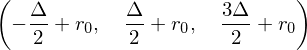

In [6]:
rm12, rp12, rp32

centers

In [8]:
r0, r1

In [10]:
A = simplify(integrate(f*r/(r0*dr), (r, rm12, rp12)))
B = simplify(integrate(f*r/(r1*dr), (r, rp12, rp32)))

The analytic forms of the integrals

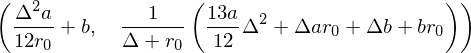

In [11]:
A, B

Our linear system is now:

$$A = f_i$$
$$B = f_{i+1}$$

Now find the coefficients of the polynomial

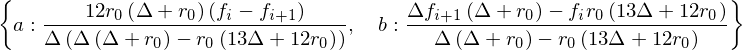

In [12]:
coeffs = solve([A-f0, B-fp], [a,b])
coeffs

And in pretty form, here's the polynomial

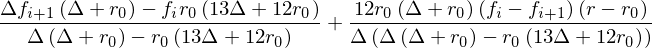

In [14]:
l = f.subs(a,coeffs[a]).subs(b,coeffs[b])
l

Now, evaluate it on the interface

In [16]:
a = l.subs(r, rp12)

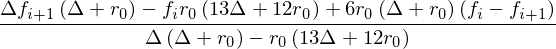

In [17]:
simplify(a)